### Librerie

In [1]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns
import plotly.graph_objects as go

<ipython-input-1-609d1db3b9d0>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# RIBILANCIAMENTO

### FUNZIONI

In [2]:
def storicizza_valori(quote, giorno):
  valore_precedente = {}
  for col in quote.columns:
    valore_precedente[col] = quote.loc[giorno,col]
  return valore_precedente

In [3]:
def ribilanciamento(dati, anni):
  investimento = 1
  output = dati.copy()
  quote = pd.DataFrame(index=[output.index[0]])
  semaforo = False
  anno_ribilanciamento = output.index[0].year
  valore_portafoglio = investimento

  #calcola le quote del primo giorno
  for t, perc in zip(titoli,percentuali):
    quote[t] = ((investimento*np.array(perc)) / output[t][0])

  for giorno in output.index:
    # primo giorno
    if giorno == output.index[0]:
      quote.loc[giorno] = quote.loc[giorno]
      valore_precedente = storicizza_valori(quote, giorno)

    elif ((giorno.year - anno_ribilanciamento) == anni):
      # ribilanciamento
      semaforo = True
      nuove_quote = [(valore_portafoglio*perc / output[t][giorno]) for t, perc in zip(titoli,percentuali)]
      quote.loc[giorno,:] = nuove_quote
      anno_ribilanciamento = giorno.year
      valore_precedente = storicizza_valori(quote, giorno)

    else:
      # non ribilanciamento
      semaforo = False
      quote.loc[giorno,:] = [valore_precedente[col] for col in quote.columns]

    # calcolo valori per giorno
    for t in titoli:
      output.loc[giorno,t+'_quote'] = quote.loc[giorno,t]
      output.loc[giorno,t+'_valore'] = quote.loc[giorno,t]*output.loc[giorno,t]

    valore_portafoglio = sum([quote.loc[giorno,t]*output.loc[giorno,t] for t in titoli])
    output.loc[giorno,'Semaforo'] = semaforo
    output.loc[giorno,'Valore Portafoglio'] = valore_portafoglio

  # calcolo percentuali di allocazione
  for t in titoli:
    output[t+'_percentuali'] = output[t+'_valore']/output['Valore Portafoglio']

  return output

In [4]:
def ribilanciamento_dinamico(dati, variazione):
  investimento = 1
  output = dati.copy()
  quote = pd.DataFrame(index=[output.index[0]])
  #per = pd.DataFrame(index=[output.index[0]])
  semaforo = False
  ribilancia = False
  anno_ribilanciamento = output.index[0].year
  valore_portafoglio = investimento

  #calcola le quote del primo giorno
  for t, perc in zip(titoli,percentuali):
    quote[t] = ((investimento*np.array(perc)) / output[t][0])

  for giorno in output.index:
    # primo giorno
    if giorno == output.index[0]:
      quote.loc[giorno] = quote.loc[giorno]
      valore_precedente = storicizza_valori(quote, giorno)

    elif ribilancia == True:
      ribilancia = False
      semaforo = True
      nuove_quote = [(valore_portafoglio*perc / output[t][giorno]) for t, perc in zip(titoli,percentuali)]
      quote.loc[giorno,:] = nuove_quote
      anno_ribilanciamento = giorno.year
      valore_precedente = storicizza_valori(quote, giorno)

    else:
      # non ribilanciamento
      semaforo = False
      quote.loc[giorno,:] = [valore_precedente[col] for col in quote.columns]

    # calcolo valori per giorno
    for t in titoli:
      output.loc[giorno,t+'_quote'] = quote.loc[giorno,t]
      output.loc[giorno,t+'_valore'] = quote.loc[giorno,t]*output.loc[giorno,t]

    valore_portafoglio = sum([quote.loc[giorno,t]*output.loc[giorno,t] for t in titoli])
    output.loc[giorno,'Semaforo'] = semaforo
    output.loc[giorno,'Valore Portafoglio'] = valore_portafoglio

    # calcolo percentuali di allocazione
    for t in titoli:
      output.loc[giorno,t+'_percentuali'] = output.loc[giorno,t+'_valore']/output.loc[giorno,'Valore Portafoglio']

    perc_allocazione = abs(np.array(output.filter(regex='percentuali').loc[giorno]))
    if sum((perc_allocazione-percentuali)>variazione):
      ribilancia = True

  return output

In [5]:
def ribilanciamento_bande(dati, variazione):
  investimento = 1
  output = dati.copy()
  quote = pd.DataFrame(index=[output.index[0]])
  #per = pd.DataFrame(index=[output.index[0]])
  semaforo = False
  ribilancia = False
  anno_ribilanciamento = output.index[0].year
  valore_portafoglio = investimento

  #calcola le quote del primo giorno
  for t, perc in zip(titoli,percentuali):
    quote[t] = ((investimento*np.array(perc)) / output[t][0])

  for giorno in output.index:
    # primo giorno
    if giorno == output.index[0]:
      quote.loc[giorno] = quote.loc[giorno]
      valore_precedente = storicizza_valori(quote, giorno)

    elif ribilancia == True:
      ribilancia = False
      semaforo = True
      nuove_quote = [(valore_portafoglio*perc / output[t][giorno]) for t, perc in zip(titoli,percentuali)]
      quote.loc[giorno,:] = nuove_quote
      anno_ribilanciamento = giorno.year
      valore_precedente = storicizza_valori(quote, giorno)

    else:
      # non ribilanciamento
      semaforo = False
      quote.loc[giorno,:] = [valore_precedente[col] for col in quote.columns]

    # calcolo valori per giorno
    for t in titoli:
      output.loc[giorno,t+'_quote'] = quote.loc[giorno,t]
      output.loc[giorno,t+'_valore'] = quote.loc[giorno,t]*output.loc[giorno,t]

    valore_portafoglio = sum([quote.loc[giorno,t]*output.loc[giorno,t] for t in titoli])
    output.loc[giorno,'Semaforo'] = semaforo
    output.loc[giorno,'Valore Portafoglio'] = valore_portafoglio

    # calcolo percentuali di allocazione
    for t in titoli:
      output.loc[giorno,t+'_percentuali'] = output.loc[giorno,t+'_valore']/output.loc[giorno,'Valore Portafoglio']

    perc_allocazione = abs(np.array(output.filter(regex='percentuali').loc[giorno]))
    pc = [p+p*variazione for p in percentuali]
    if sum(perc_allocazione>pc):
      ribilancia = True

  return output

In [6]:
#ribilanciamento_dinamico(prezzi,0.05).loc[rr['Semaforo']==True]

### INPUT&ELABORAZIONI

In [7]:
# ['VFINX', 'S&P500'],
# ['VBMFX', 'US Bonds'],
# ['^FTSE', 'UK100'],
# ['^DJI', 'DowJones'],
# ['^GDAXI', 'DAX'],
# ['^N100', 'Euronext 100'],
# ['GLD','Oro'],
# ['SPY','S&P500'],
# ['TLT','20y US bonds'],
# ['SHY', '1-3y US bonds'],
# ['IEF', '7-10y US bonds'],
# ['^IXIC', 'Nasdaq'],

tickers = [['VFINX','S&P500'],['VBMFX','US bonds']]
#tickers = [['SPY','S&P500'],['QQQ', 'Nasdaq'],['TLT','20y US bonds'],['SHY', '1-3y US bonds'],['IEF', '7-10y US bonds']]
titoli = [l[0] for l in tickers]
nomi = [l[1] for l in tickers]
#percentuali = [0.6, 0.3, 0.1]
percentuali = [1/len(titoli)]*len(titoli)
durata_portafogli = 10

# variabili di ribilanciamento
periodo = 1 # ogni quanti anni effettuare un ribilanciamento
variazione = 0.1 # variazione dinamica

prezzi = yf.download(titoli)['Adj Close']
prezzi = prezzi.reindex(titoli,axis=1).dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
#controlla numerica prezzi per anno
conta=[]
for c in prezzi.columns:
  for a in prezzi[c].index.year.unique():
    num = round(len(prezzi[c][(prezzi.index.year==a)])/252.25,2)
    conta.append(num)
    print(a,c, num)
  #print('media per titolo', c, round(prezzi[c].count()/len(prezzi[c].index.year.unique()))

In [9]:
# NO RIBILANCIAMENTO
norib = ribilanciamento(prezzi,999)

In [10]:
# RIBILANCIAMENTO PERIODICO
periodico = ribilanciamento(prezzi, periodo)

In [11]:
# RIBILANCIAMENTO DINAMICO CORRIDOIO
dinamico = ribilanciamento_dinamico(prezzi,variazione)

In [12]:
# RIBILANCIAMENTO DINAMICO BANDE
dinamico_bande = ribilanciamento_bande(prezzi,variazione)

In [13]:
# calcolo rendimenti logaritmici giornalieri sul portafoglio
norib['Rendimento Portafoglio'] = np.log(norib['Valore Portafoglio']/norib['Valore Portafoglio'].shift(1))
periodico['Rendimento Portafoglio'] = np.log(periodico['Valore Portafoglio']/periodico['Valore Portafoglio'].shift(1))
dinamico['Rendimento Portafoglio'] = np.log(dinamico['Valore Portafoglio']/dinamico['Valore Portafoglio'].shift(1))
dinamico_bande['Rendimento Portafoglio'] = np.log(dinamico_bande['Valore Portafoglio']/dinamico_bande['Valore Portafoglio'].shift(1))

In [14]:
# creo dataframe di rendimenti giornalieri
rendimenti = pd.DataFrame({
    'No ribilanciamento': norib['Rendimento Portafoglio'],
    'Ribilanciamento periodico': periodico['Rendimento Portafoglio'],
    'Ribilanciamento dinamico corridoio': dinamico['Rendimento Portafoglio'],
    'Ribilanciamento dinamico bande': dinamico_bande['Rendimento Portafoglio']
}).dropna()

# calcolo portafogli di X anni
rendimenti_mensili = rendimenti.resample('M').sum()
rendimenti_rolling = rendimenti_mensili.rolling(window=12).sum().dropna()
rendimenti_rolling.index = rendimenti_rolling.index - pd.DateOffset(months=12)
rendimenti_rolling = rendimenti_rolling.rolling(window=durata_portafogli*12).mean().dropna()
rendimenti_rolling.index = rendimenti_rolling.index - pd.DateOffset(years=durata_portafogli)

In [15]:
print('N° ribilanciamenti periodici: ', periodico['Semaforo'].sum())
print('N° ribilanciamenti dinamici corridoio: ', dinamico['Semaforo'].sum())
print('N° ribilanciamenti dinamici bande: ', dinamico_bande['Semaforo'].sum())

N° ribilanciamenti periodici:  37
N° ribilanciamenti dinamici corridoio:  8
N° ribilanciamenti dinamici bande:  28


In [16]:
rendimenti_rolling.describe()

,No ribilanciamento,Ribilanciamento periodico,Ribilanciamento dinamico corridoio,Ribilanciamento dinamico bande
count,311.000000,311.000000,311.000000,311.000000
mean,0.079523,0.075478,0.079300,0.075582
std,0.033771,0.027643,0.026607,0.026358
min,0.006965,0.024112,0.026448,0.023746
25%,0.061526,0.057764,0.063003,0.060539
50%,0.081342,0.074754,0.078733,0.074257
75%,0.101916,0.089928,0.092576,0.088234
max,0.136895,0.129622,0.131725,0.127142


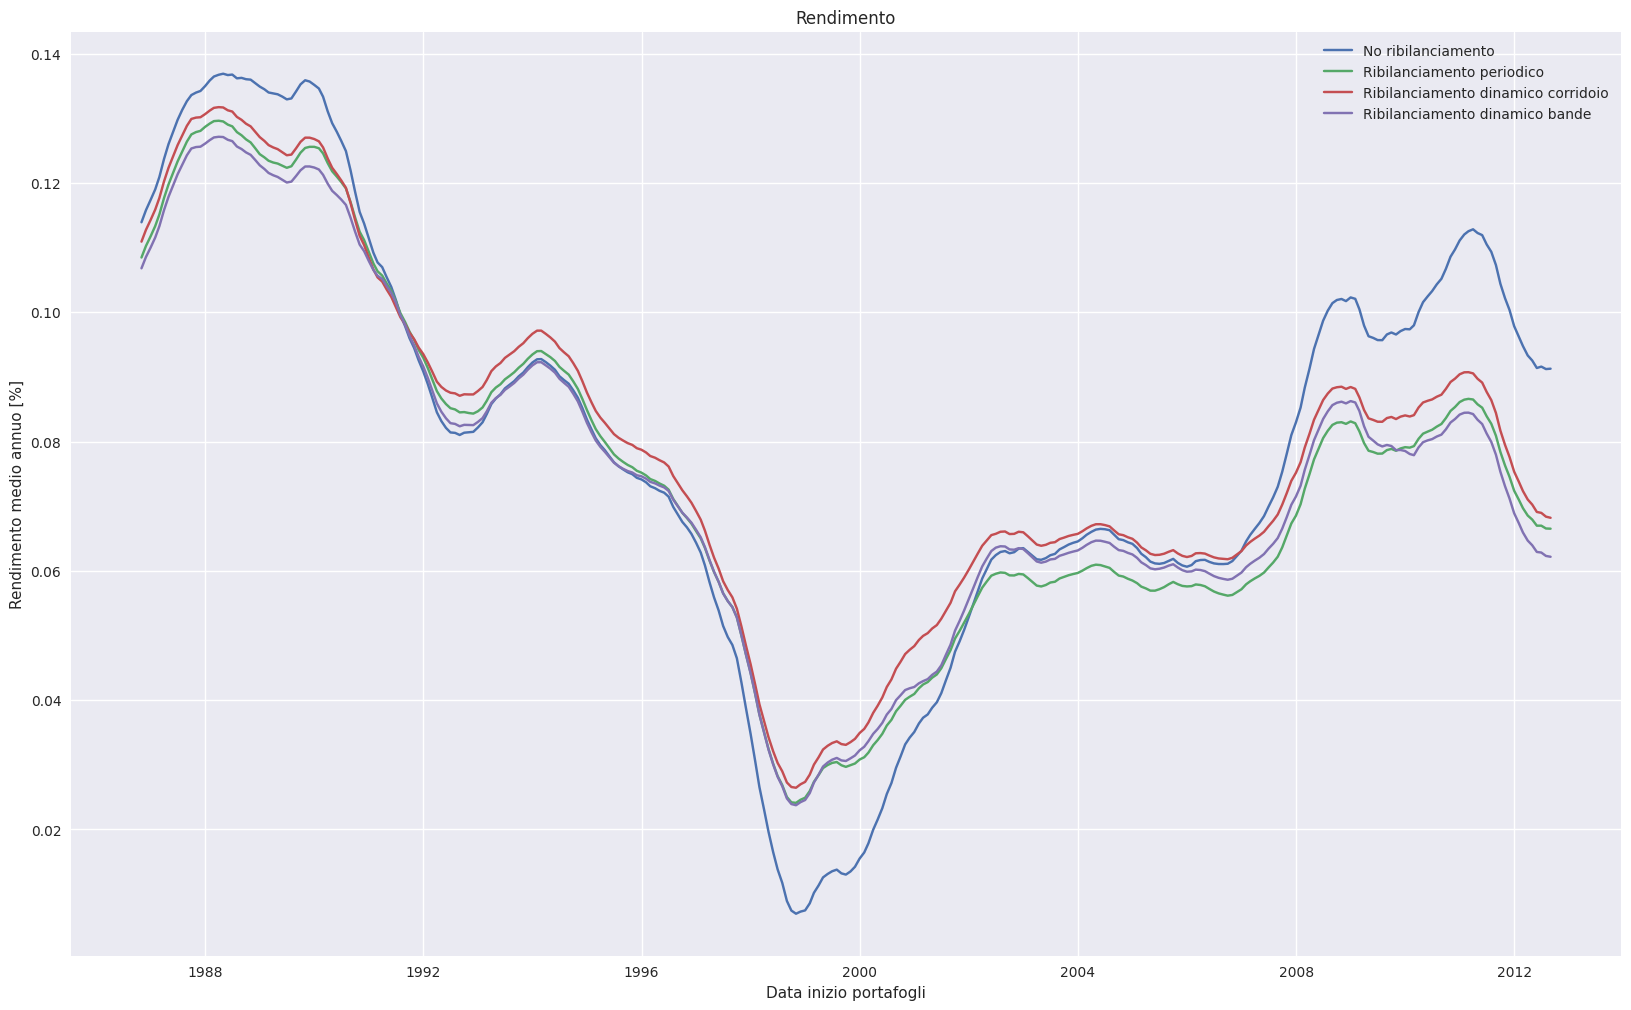

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.plot(rendimenti_rolling, label=rendimenti_rolling.columns)
plt.ylabel('Rendimento medio annuo [%]')
plt.xlabel('Data inizio portafogli')
plt.title('Rendimento')
plt.legend()
plt.show()

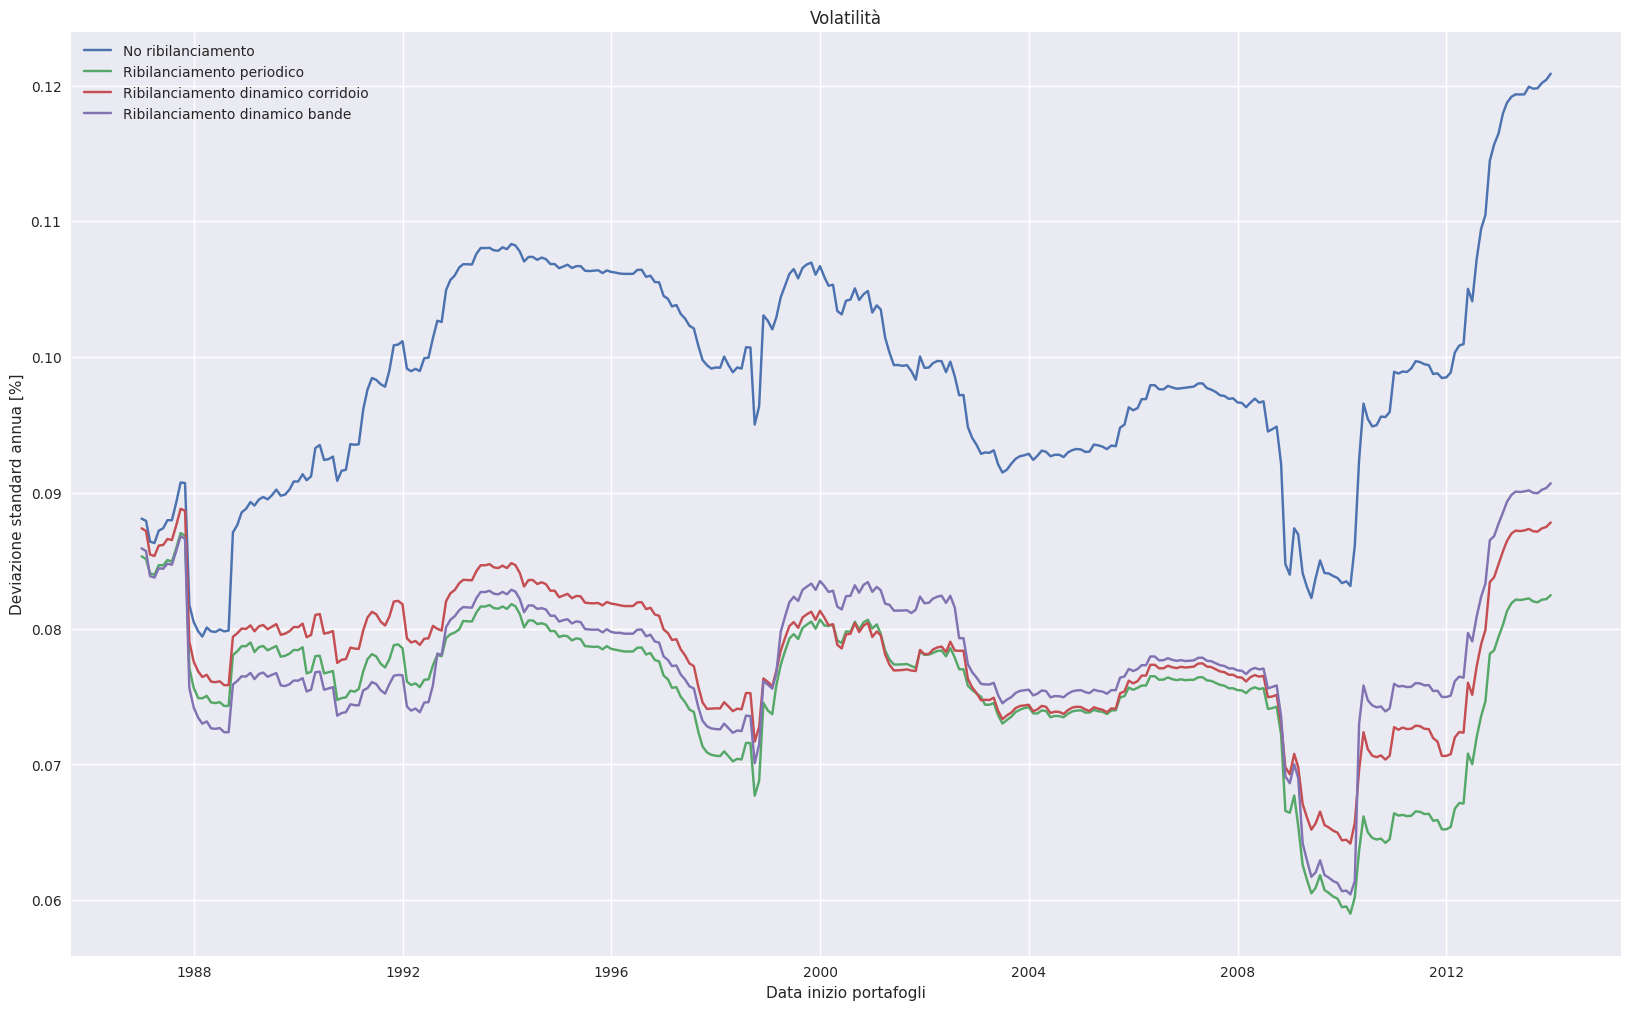

In [19]:
# calcolo volatilità per portafoglio
mesi = rendimenti_mensili.index
maxyear= rendimenti_mensili.index.year.max()
indice = [mese for mese in mesi if mese.year<=maxyear-durata_portafogli]
stdev = []

for m in indice:
  x = rendimenti_mensili[(rendimenti_mensili.index>=m) & (rendimenti_mensili.index<m+pd.DateOffset(years=durata_portafogli))]
  dev = np.std(x)
  stdev.append(dev)
stdev = pd.DataFrame(stdev)
stdev.index = indice
stdev = stdev*np.sqrt(12)

# grafico
sns.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.plot(stdev, label=stdev.columns)
plt.ylabel('Deviazione standard annua [%]')
plt.xlabel('Data inizio portafogli')
plt.title('Volatilità')
plt.legend()
plt.show()

In [20]:
stdev.mean()

No ribilanciamento                    0.098434
Ribilanciamento periodico             0.075569
Ribilanciamento dinamico corridoio    0.077966
Ribilanciamento dinamico bande        0.077660
dtype: float64

## GRAFICI
<hr>

### Asset allocation nel tempo

In [21]:
df1 = norib.filter(regex='percentuali')
df2 = periodico.filter(regex='percentuali')
df3 = dinamico.filter(regex='percentuali')
df4 = dinamico_bande.filter(regex='percentuali')
dataframes = [df1,df2,df3,df4]
titoli_subplot = ["No ribilanciamento", "Ribilanciamento annuale", "Constant-mix corridoio", "Constant-mix bande"]

In [ ]:
# creazione di una figura con N subplots
sns.set_style('white')
fig, axes = plt.subplots(nrows=len(dataframes), ncols=1, figsize=(12, 10))
#fig.suptitle("Asset allocation")

# creazione dei grafici ad area per ciascun subplot
for i, ax in enumerate(axes.flatten()):
    if i < len(dataframes):
        df = dataframes[i]
        ax.stackplot(df.index, df.T, labels=nomi)
        ax2 = ax.twinx()
        ax.set_title(titoli_subplot[i])
        ax.set_ylabel('Allocazione %')
        ax.axhline(y=0.5, color='black', linewidth=0.5)

# aggiungi la legenda in fondo una sola volta
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(titoli))

# aggiusta il layout e mostra il grafico
plt.tight_layout()
plt.show()